In [2]:
! pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 101.1 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)
  Using cached numpy-1.23.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip


In [4]:
! pip install matplotlib

  Using cached matplotlib-3.5.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached Pillow-9.2.0-cp38-cp38-manylinux_2_28_x86_64.whl (3.2 MB)
  Using cached kiwisolver-1.4.4-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
  Using cached fonttools-4.34.4-py3-none-any.whl (944 kB)

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip


In [7]:
! pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached scipy-1.8.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.6 MB)

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip


In [9]:
! pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.7 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 2.2 MB/s eta 0:00:001 MB/s eta 0:00:01
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 768.2/768.2 kB 21.1 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.5 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip


In [11]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install wordcloud
!pip install sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 kB 7.2 MB/s eta 0:00:000:00:01

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-1.1.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (31.2 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip


In [46]:
# Step 0. Load libraries and custom modules
# Dataframes and matrices ----------------------------------------------
import pandas as pd
import numpy as np
# Graphics -------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
plt.style.use('tableau-colorblind10')
# Mathematical functions -----------------------------------------------
from scipy.stats import norm
# Text processors ------------------------------------------------------
import unicodedata
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
# Preprocessing --------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# Text modeling --------------------------------------------------------
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Model creating -------------------------------------------------------
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# Metrics --------------------------------------------------------------
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
# Custom functions -----------------------------------------------------
from text_preprocessing import clean_stopwords

[nltk_data] Downloading package stopwords to /home/gitpod/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
# We'll use a collection of sentiments for text analysis as a dataset
# This dataset was published in Saif M. Mohammad and Peter Turney. (2013), 
# ``Crowdsourcing a Word-Emotion Association Lexicon.'' 
# Computational Intelligence, 29(3): 436-465.
# It's only for research and educational purposes.
# URL: http://saifmohammad.com/WebPages/lexicons.html  
nrc = pd.read_csv('../data/raw/NRC.csv', names=['word','sentiment','polarity'])
nrc = nrc.query('polarity == 1')

In [17]:
nrc

,word,sentiment,polarity
19,abacus,trust,1
23,abandon,fear,1
25,abandon,negative,1
27,abandon,sadness,1
30,abandoned,anger,1
...,...,...,...
141461,zest,anticipation,1
141464,zest,joy,1
141466,zest,positive,1
141469,zest,trust,1


In [18]:
# Step 1. Load the data
# Data extracted from https://www.thetrumparchive.com
# Data case: During the 2016 US presidential election, the candidate 
# Donald Trump used twitter to communicate with potential voters. 
# The campaign was during 2015-06-17 and 2016-11-08
# We'll try to analyze these campaign tweets from iPhone and Android
# Data description
# source -> device of origin
# id_str -> unique identifier
# text -> tweet text content
# created_at -> Date of creation, not including timezone
# retweet_count -> Count of retweets (difusion)
# in_reply_to_usr_id_str -> If it's a reply, grab the user id
# favourite_count -> Count of users that liked the tweet
# is_retweet -> If the post is a retweet  
# 1.1 Open data and get a glimpse
df_raw = pd.read_csv('../data/raw/trump_tweets.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20761 entries, 0 to 20760
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   source                   20761 non-null  object 
 1   id_str                   20761 non-null  int64  
 2   text                     20761 non-null  object 
 3   created_at               20761 non-null  object 
 4   retweet_count            20761 non-null  int64  
 5   in_reply_to_user_id_str  2442 non-null   float64
 6   favorite_count           20761 non-null  int64  
 7   is_retweet               20761 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 1.1+ MB


In [19]:
# 1.1 Sample some observations
df_raw.sample(10)

,source,id_str,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet
12316,Twitter for iPhone,675120470346358784,An honor to be endorsed by the New England Pol...,2015-12-11T01:10:37Z,2762,NaN,6884,False
1861,Twitter Web Client,261840564050333697,@Erizzle05 Only because he has something to h...,2012-10-26T14:43:49Z,1,NaN,0,False
16109,Twitter for iPhone,769308316350623744,I will be interviewed by @kimguilfoyle \nat 7p...,2016-08-26T22:59:30Z,2432,NaN,10422,False
10481,Twitter Web Client,516616683533115392,.@JustinRose99 The display you put on this wee...,2014-09-29T15:53:10Z,10,NaN,28,False
17287,Twitter for Android,724236172181049344,.@AndreBauer Great job and advice on @CNN @j...,2016-04-24T13:58:53Z,1643,NaN,6402,False
6116,Twitter Web Client,355033867486363648,Must read @AmSpec article by Jeffrey Lord: “Th...,2013-07-10T18:40:44Z,12,NaN,9,False
2161,Twitter Web Client,257522310481854465,Yankees can win today. Kuroda is a highly unde...,2012-10-14T16:44:38Z,75,NaN,18,False
16996,Twitter for Android,735344013499326465,"@elizabethforma Goofy Elizabeth Warren, someti...",2016-05-25T05:37:29Z,2121,357606935.0,4909,False
7234,Twitter Web Client,324982893308956672,Another great shot from the beginning of const...,2013-04-18T20:28:54Z,13,NaN,14,False
3391,Twitter Web Client,204955707324375040,"I loved Walter Cronkite, one of the all time g...",2012-05-22T15:23:43Z,29,NaN,9,False


In [22]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20761 entries, 0 to 20760
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   source                   20761 non-null  object 
 1   id_str                   20761 non-null  int64  
 2   text                     20761 non-null  object 
 3   created_at               20761 non-null  object 
 4   retweet_count            20761 non-null  int64  
 5   in_reply_to_user_id_str  2442 non-null   float64
 6   favorite_count           20761 non-null  int64  
 7   is_retweet               20761 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 1.1+ MB


In [20]:
# Step 2. Transform and wrangle the data
# 2.1 Make a copy
df_interim = df_raw.copy()

In [21]:
# 2.2 Get rid of uninformative columns
df_interim = df_interim.drop(['id_str','is_retweet','in_reply_to_user_id_str'], axis=1)

In [23]:
# 2.3 Convert columns to the right format
df_interim['created_at'] = df_interim['created_at'].astype('datetime64')
df_interim['source'] = pd.Categorical(df_interim['source'])

In [24]:
# 2.4 Filter dates for analysis
df_interim = df_interim.loc[(df_interim['created_at'] >= '2015-06-17') \
    & (df_interim['created_at'] <= '2016-11-08')]

In [25]:
# 2.5 Consider time is UTC, convert to EST (EST 5 hs atrás de UTC)
df_interim['created_at'] += pd.Timedelta(-5, unit = 'h') # quita cinco hs

In [26]:
# 2.5 Filter source for analysis (sólo iphone y android)
df_interim = df_interim.loc[(df_interim['source'].str.contains('iPhone')) \
    | (df_interim['source'].str.contains('Android'))]
df_interim['source'] = df_interim['source'].cat.remove_unused_categories()

In [28]:
# 2.5 Save and create a copy for analysis
df_interim.to_csv('../data/interim/trump_tweets.csv', index=False)
df = df_interim.copy()

In [29]:
# Step 3. Perform EDA
# 3.1 Get basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3946 entries, 12072 to 18506
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   source          3946 non-null   category      
 1   text            3946 non-null   object        
 2   created_at      3946 non-null   datetime64[ns]
 3   retweet_count   3946 non-null   int64         
 4   favorite_count  3946 non-null   int64         
dtypes: category(1), datetime64[ns](1), int64(2), object(1)
memory usage: 158.0+ KB


In [30]:
# 3.2 Get a sample
df.sample(10)

,source,text,created_at,retweet_count,favorite_count
16712,Twitter for iPhone,One of the reasons Hillary hid her emails was ...,2016-06-30 14:28:27,7800,17155
13009,Twitter for Android,"Iowa was amazing today. Great crowd, great peo...",2015-10-07 18:17:34,1054,2280
12406,Twitter for iPhone,".@KatyTurNBC, 3rd rate reporter &amp; @SopanDe...",2015-12-05 19:36:03,1313,2655
13202,Twitter for iPhone,Lightweight Senator @RandPaul should focus on ...,2015-09-12 14:55:54,1156,2463
16259,Twitter for iPhone,.@Larry_Kudlow - 'Donald Trump Is the middle-c...,2016-08-06 21:03:39,8639,20795
13088,Twitter for iPhone,"The failing @politico news outlet, which I hea...",2015-09-24 16:42:25,1512,2664
17074,Twitter for Android,Amazing that Crooked Hillary can do a hit ad o...,2016-05-17 06:58:10,14784,36997
15442,Twitter for iPhone,Get out and vote! I am your voice and I will f...,2016-10-25 09:44:51,13016,27874
12235,Twitter for iPhone,"Thank you, @FrankLuntz - for saying I was a wi...",2015-12-15 23:21:22,2875,8869
18086,Twitter for iPhone,Everybody is laughing at Jeb Bush-spent $100 m...,2016-02-08 11:38:00,3017,8385


In [31]:
# 3.3 Describe numerical and datetime data
df.describe(datetime_is_numeric=True)

,created_at,retweet_count,favorite_count
count,3946,3946.000000,3946.000000
mean,2016-03-31 07:49:53.323872256,5839.465281,15666.982767
min,2015-06-19 20:03:05,61.000000,167.000000
25%,2015-12-20 18:19:10.500000,2013.250000,5350.000000
50%,2016-03-16 05:29:30.500000,4162.500000,11981.500000
75%,2016-07-25 09:04:26.500000,7807.250000,21527.000000
max,2016-11-07 17:21:53,168765.000000,297281.000000
std,NaN,6156.818896,14650.408743


In [32]:
# 3.4 Describe categorical data
df['source'].value_counts()

Twitter for iPhone     2099
Twitter for Android    1847
Name: source, dtype: int64

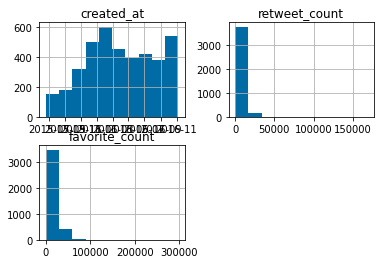

In [33]:
# 3.5 Get histograms for numerical data
df.hist()
plt.show()

In [36]:
# 3.6 Make a plot of tweets frequence rate by source
df_plot = (df
           .assign(hour = df['created_at'].dt.hour)
           .groupby(['source', 'hour'])
           .agg(count = ('source', 'count'))
           .assign(rate = lambda df: df['count']/df.groupby('source')['count'].sum())
           .reset_index())
df_plot

,source,hour,count,rate
0,Twitter for Android,0,22,0.011911
1,Twitter for Android,1,2,0.001083
2,Twitter for Android,2,6,0.003249
3,Twitter for Android,3,1,0.000541
4,Twitter for Android,4,28,0.015160
5,Twitter for Android,5,98,0.053059
6,Twitter for Android,6,159,0.086086
7,Twitter for Android,7,194,0.105035
8,Twitter for Android,8,210,0.113698
9,Twitter for Android,9,132,0.071467


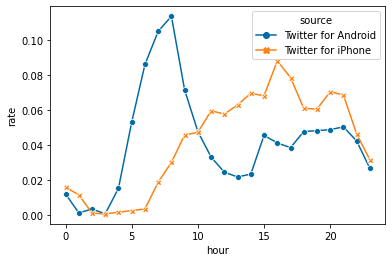

In [41]:
sns.lineplot(data=df_plot, x = 'hour', y = 'rate', hue = 'source', markers = True, style = 'source', dashes = False)
plt.show()

In [42]:
# 3.7 Get a glimpse of the most retweeted tweets
df.sort_values(by = 'retweet_count', ascending = False)[['text', 'retweet_count']][:10]

,text,retweet_count
16875,How long did it take your staff of 823 people ...,168765
17183,Happy #CincoDeMayo! The best taco bowls are ma...,85465
15333,MAKE AMERICA GREAT AGAIN!,59098
15758,Here is my statement. https://t.co/WAZiGoQqMQ,51891
16548,Such a great honor to be the Republican Nomine...,41616
15340,If Obama worked as hard on straightening out o...,41479
15827,For those few people knocking me for tweeting ...,40850
15756,The media and establishment want me out of the...,40772
16583,I am pleased to announce that I have chosen Go...,38782
16848,Is President Obama going to finally mention th...,38456


In [43]:
# 3.8 Get a glimpse of the most liked tweets
df.sort_values(by = 'favorite_count', ascending = False)[['text', 'favorite_count']][:10]

,text,favorite_count
16875,How long did it take your staff of 823 people ...,297281
16548,Such a great honor to be the Republican Nomine...,129652
15758,Here is my statement. https://t.co/WAZiGoQqMQ,120244
15781,Mike Pence won big. We should all be proud of ...,120189
17183,Happy #CincoDeMayo! The best taco bowls are ma...,119759
15333,MAKE AMERICA GREAT AGAIN!,115387
15827,For those few people knocking me for tweeting ...,107497
15756,The media and establishment want me out of the...,105680
15340,If Obama worked as hard on straightening out o...,102045
16583,I am pleased to announce that I have chosen Go...,92250


In [44]:
# 3.9 Let's get a glimpse of common words in the tweets' text
df['text'].str.split(expand = True).stack().value_counts()[:10]

the    1965
to     1369
and    1186
I      1133
in     1098
a       987
of      957
is      904
on      829
for     703
dtype: int64

In [47]:
# 3.10 Process text to extract stopwords
df['text_clean'] = df['text'].str.lower()
stop_dict = stopwords.words('english')
df['text_clean'] = df['text_clean'].apply(lambda x: clean_stopwords(x, stop_dict = stop_dict))
df['text_clean'] = df['text_clean'].str.replace(r'''['!,.]''', '', regex = True)

## hay que usar función lambda porque la función tiene más de un argumento

In [48]:
# 3.11 Extract urls (https://t.co linkea a una imagen)
url_pat = 'https://t.co/[A-Za-z\d]+|&amp;'
df['text_clean'] = df['text_clean'].str.replace(url_pat, '', regex = True)


In [49]:
# 3.12 Extract special characters
df['text_clean'] = df['text_clean'].str.replace(r'''[!.,():\-%$/'"']''', '', regex = True)

In [50]:
# 3.13 Extract numbers
df['text_clean'] = df['text_clean'].str.replace(r'[\d]+', '', regex = True)

In [51]:
# 3.14 See the results
df[['text', 'text_clean']].sample(10)

,text,text_clean
12437,Why can't @Politico get better reporters than ...,cant @politico get better reporters ben schrec...
12390,"Gee, @meetthepress with @chucktodd was getting...",gee @meetthepress @chucktodd getting terrible ...
18419,UL has lost all credibility under Joe McQuaid ...,ul lost credibility joe mcquaid w circulation ...
16183,Will be on @SeanHannity tonight at 10pmE - del...,@seanhannity tonight pme delivering important...
15680,Thank you! #MAGA #AmericaFirst https://t.co/fG...,thank you #maga #americafirst httpstcofgwjlkm
17006,"I just released my financial disclosure forms,...",released financial disclosure forms largest nu...
15674,"Join me live in Cincinnati, Ohio!\n#TrumpRally...",join live cincinnati ohio #trumprally #maga ht...
13700,.....but that's what I've been saying. Very un...,but thats ive saying unfair treatment media
16165,Thank you to everyone for all of the nice comm...,thank everyone nice comments twitter pundits o...
12909,.@CNBC has just agreed that the debate will be...,@cnbc agreed debate two hours fantastic news a...


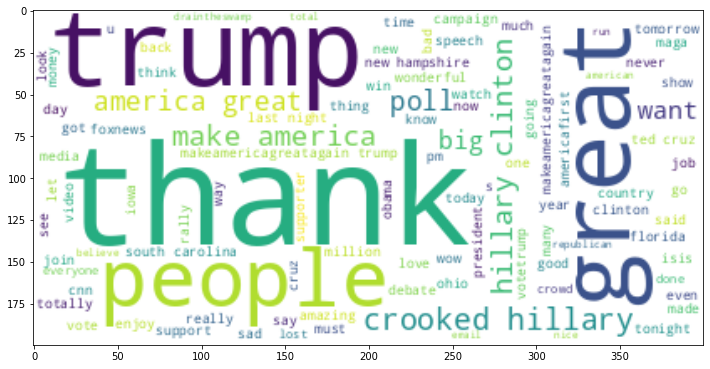

In [53]:
# 3.15 Let's see a wordcloud
text = ' '.join(i for i in df.text_clean)
wordcloud = WordCloud(max_words = 100, background_color = 'White').generate(text)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()


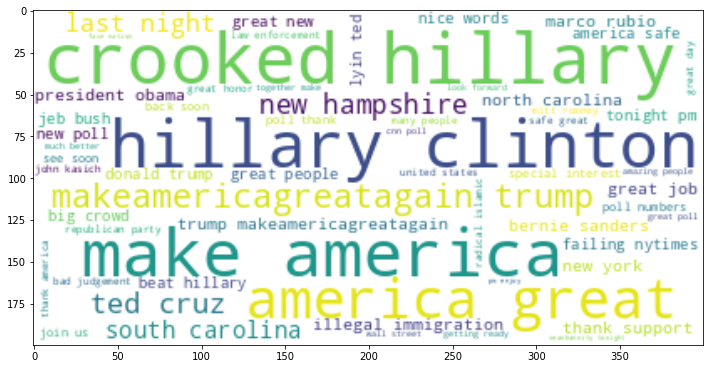

In [55]:
# bigramo (cruzando 2 palabras)
wordcloud_bg = WordCloud(collocation_threshold = 2, collocations = True, max_words = 100, background_color = 'White').generate(text)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud_bg, interpolation = 'bilinear')
plt.show()

In [56]:
# partir texto en palabras, se asocia cada palabra a un sentimiento
df_word_split = (df
                 .drop(['text', 'created_at', 'retweet_count', 'favorite_count'], axis = 1)
                 .assign(text = df['text_clean'].str.split())).explode('text').drop('text_clean', axis = 1).rename(columns = {'text':'word'})
df_word_split                 


,source,word
12072,Twitter for Android,would
12072,Twitter for Android,like
12072,Twitter for Android,wish
12072,Twitter for Android,everyone
12072,Twitter for Android,happy
...,...,...
18506,Twitter for Android,together
18506,Twitter for Android,make
18506,Twitter for Android,america
18506,Twitter for Android,great


In [57]:
df_word_split.shape

(41858, 2)

In [59]:
# inner join para traer más info, nrc contiene la palabra y su sentimiento
df_word_split.merge(nrc[['word', 'sentiment']], on = 'word', how = 'inner')

,source,word,sentiment
0,Twitter for Android,happy,anticipation
1,Twitter for Android,happy,joy
2,Twitter for Android,happy,positive
3,Twitter for Android,happy,trust
4,Twitter for iPhone,happy,anticipation
...,...,...,...
17547,Twitter for Android,stiff,negative
17548,Twitter for Android,embarrassment,fear
17549,Twitter for Android,embarrassment,negative
17550,Twitter for Android,embarrassment,sadness


In [61]:
# cuando el código es multilinea se usa backslash
df_sent = df_word_split.\
    merge(nrc[['word', 'sentiment']], on = 'word', how = 'inner').\
    groupby(['source', 'sentiment']).agg(count = ('sentiment', 'count')).\
    reset_index().pivot_table(index = ['sentiment'], columns = ['source'], values = 'count').\
    reset_index().\
    rename(columns = {'Twitter for Android': 'Android', 'Twitter for iPhone': 'iPhone'})
df_sent

source,sentiment,Android,iPhone
0,anger,949,514
1,anticipation,986,725
2,disgust,632,307
3,fear,815,477
4,joy,743,543
5,negative,1671,925
6,positive,1963,1522
7,sadness,911,512
8,surprise,587,385
9,trust,1363,1022


In [64]:
# frecuencias relativas, odds ratio
df_odd_ratio = df_sent.\
              assign(odd_ratio = (df_sent['Android']/(df_sent['Android'].sum()-df_sent['Android']))/(df_sent['iPhone']/(df_sent['iPhone'].sum()-df_sent['iPhone'])))
df_odd_ratio['log_or'] = np.log(df_odd_ratio['odd_ratio'])

In [65]:
df_odd_ratio

source,sentiment,Android,iPhone,odd_ratio,log_or
0,anger,949,514,1.225269,0.203160
1,anticipation,986,725,0.876222,-0.132136
2,disgust,632,307,1.365482,0.311508
3,fear,815,477,1.124833,0.117634
4,joy,743,543,0.885109,-0.122044
5,negative,1671,925,1.212601,0.192767
6,positive,1963,1522,0.806001,-0.215670
7,sadness,911,512,1.176546,0.162583
8,surprise,587,385,0.994922,-0.005091
9,trust,1363,1022,0.851456,-0.160808


In [82]:
# creamos intervalos de confianza
df_odd_ratio['se'] = np.sqrt(1/df_odd_ratio['Android'] + 1/(df_odd_ratio['Android'].sum()-df_odd_ratio['Android'])+1/df_odd_ratio['iPhone']+1/(df_odd_ratio['iPhone'].sum()-df_odd_ratio['iPhone']))
df_odd_ratio['conf_low'] = df_odd_ratio['log_or'] - norm.ppf(0.975)*df_odd_ratio['se']
df_odd_ratio['conf_high'] = df_odd_ratio['log_or'] + norm.ppf(0.975)*df_odd_ratio['se']
df_odd_ratio.sort_values(by = 'log_or', ascending = False)


source,sentiment,Android,iPhone,odd_ratio,log_or,se,conf_low,conf_high
2,disgust,632,307,1.365482,0.311508,0.071349,0.171666,0.451349
0,anger,949,514,1.225269,0.203160,0.057083,0.091280,0.315041
5,negative,1671,925,1.212601,0.192767,0.044246,0.106046,0.279489
7,sadness,911,512,1.176546,0.162583,0.057529,0.049828,0.275338
3,fear,815,477,1.124833,0.117634,0.059836,0.000358,0.234910
8,surprise,587,385,0.994922,-0.005091,0.067479,-0.137347,0.127165
4,joy,743,543,0.885109,-0.122044,0.058697,-0.237087,-0.007001
1,anticipation,986,725,0.876222,-0.132136,0.051560,-0.233192,-0.031081
9,trust,1363,1022,0.851456,-0.160808,0.044602,-0.248227,-0.073388
6,positive,1963,1522,0.806001,-0.215670,0.038299,-0.290735,-0.140606


Se quiere que el intervalo no contenga el cero, por ejemplo en surprise no se sabe si el sentimiento proviene de android o iphone

**Resumen:** Se concluye que hubo 2 identidades distintas tweeteando, el del Android escribe tweets negativos, mientras que el del iPhone escribe tweets positivos

In [74]:
df_odd_ratio

source,sentiment,Android,iPhone,odd_ratio,log_or,se,conf_low,conf_hight
6,positive,1963,1522,0.806001,-0.215670,0.038299,-0.290735,-0.140606
9,trust,1363,1022,0.851456,-0.160808,0.044602,-0.248227,-0.073388
1,anticipation,986,725,0.876222,-0.132136,0.051560,-0.233192,-0.031081
4,joy,743,543,0.885109,-0.122044,0.058697,-0.237087,-0.007001
8,surprise,587,385,0.994922,-0.005091,0.067479,-0.137347,0.127165
3,fear,815,477,1.124833,0.117634,0.059836,0.000358,0.234910
7,sadness,911,512,1.176546,0.162583,0.057529,0.049828,0.275338
5,negative,1671,925,1.212601,0.192767,0.044246,0.106046,0.279489
0,anger,949,514,1.225269,0.203160,0.057083,0.091280,0.315041
2,disgust,632,307,1.365482,0.311508,0.071349,0.171666,0.451349


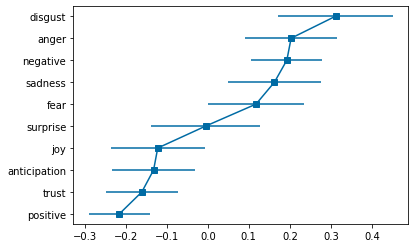

In [77]:
df_odd_ratio = df_odd_ratio.sort_values(by = 'log_or', ascending = True)
plt.errorbar(df_odd_ratio['log_or'], df_odd_ratio['sentiment'], marker = 's', xerr = ((df_odd_ratio.log_or-df_odd_ratio.conf_low),(df_odd_ratio.conf_high-df_odd_ratio.log_or)))
plt.show()